<a href="https://colab.research.google.com/github/SachinScaler/DAV1Aug24/blob/main/Pandas_3%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download dataset
# !gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
# !gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

In [2]:
import pandas as pd

movies = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/DAV1Aug24/main/movies.csv')
movies.head()

Unnamed: 0     id     budget  popularity     revenue  \
0           0  43597  237000000         150  2787965087   
1           1  43598  300000000         139   961000000   
2           2  43599  245000000         107   880674609   
3           3  43600  250000000         112  1084939099   
4           5  43602  258000000         115   890871626   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
4                              Spider-Man 3           5.9        3576   

   director_id  year month       day  
0         4762  2009   Dec  Thursday  
1         4763  2007   May  Saturday  
2         4764  2015   Oct    Monday  
3         4765  2012   Jul    Monday  
4         4767  2007   May   Tuesday

In [3]:
import pandas as pd

# setting index_col as col 0
movies = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/DAV1Aug24/main/movies.csv', index_col = 0)
movies.head()

id     budget  popularity     revenue  \
0  43597  237000000         150  2787965087   
1  43598  300000000         139   961000000   
2  43599  245000000         107   880674609   
3  43600  250000000         112  1084939099   
5  43602  258000000         115   890871626   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
5                              Spider-Man 3           5.9        3576   

   director_id  year month       day  
0         4762  2009   Dec  Thursday  
1         4763  2007   May  Saturday  
2         4764  2015   Oct    Monday  
3         4765  2012   Jul    Monday  
5         4767  2007   May   Tuesday

columns as features

In [4]:
movies.shape

(1465, 11)

In [5]:
movies['id'].nunique()

1465

In [6]:
movies['director_id'].nunique()

199

In [7]:
directors = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/DAV1Aug24/main/directors.csv', index_col = 0)
directors.head()

director_name    id gender
0      James Cameron  4762   Male
1     Gore Verbinski  4763   Male
2         Sam Mendes  4764   Male
3  Christopher Nolan  4765   Male
4     Andrew Stanton  4766   Male

In [8]:
movies.head()

id     budget  popularity     revenue  \
0  43597  237000000         150  2787965087   
1  43598  300000000         139   961000000   
2  43599  245000000         107   880674609   
3  43600  250000000         112  1084939099   
5  43602  258000000         115   890871626   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
5                              Spider-Man 3           5.9        3576   

   director_id  year month       day  
0         4762  2009   Dec  Thursday  
1         4763  2007   May  Saturday  
2         4764  2015   Oct    Monday  
3         4765  2012   Jul    Monday  
5         4767  2007   May   Tuesday

In [9]:
directors.shape

(2349, 3)

Q: How can we find details of movies each director has made?

In [10]:
directors['director_name'].nunique()

2349

In [11]:
directors['id'].nunique()

2349

In [12]:
movies['director_id'].nunique()

199

- id from directors contains same info director_id from movies

In [13]:
directors['id'].nunique()

2349

### applying function on dataframe

In [14]:
movies['director_id']

0       4762
1       4763
2       4764
3       4765
5       4767
        ... 
4736    4809
4743    5369
4748    5148
4749    5535
4768    5097
Name: director_id, Length: 1465, dtype: int64

In [15]:
import numpy  as np

# randomly selected director_id from movies is present in director
some_dir_id = 4767

np.any(directors['id'] == some_dir_id)

True

In [16]:
(directors['id'] == some_dir_id).value_counts()

id
False    2348
True        1
Name: count, dtype: int64

In [17]:
directors[directors['id'] == some_dir_id]

director_name    id gender
5     Sam Raimi  4767   Male

### isin
- isin: takes in iterable such as series, list, numpy array etc and return a series of True and False

In [18]:
directors['id']

0       4762
1       4763
2       4764
3       4765
4       4766
        ... 
2344    7106
2345    7107
2346    7108
2347    7109
2348    7110
Name: id, Length: 2349, dtype: int64

In [19]:
movies['director_id'].isin([4767])

0       False
1       False
2       False
3       False
5        True
        ...  
4736    False
4743    False
4748    False
4749    False
4768    False
Name: director_id, Length: 1465, dtype: bool

In [20]:
# you can think for this as for_loop on director_id where each dir_id is being checked in directors['id']
np.all(movies['director_id'].isin(directors['id']))

True

In [21]:
data = pd.merge(movies, directors,
                left_on = 'director_id',
                right_on = 'id',
                suffixes=('_movies', '_dirs'))
data.head()

id_movies     budget  popularity     revenue                       title  \
0      43597  237000000         150  2787965087                      Avatar   
1      43622  200000000         100  1845034188                     Titanic   
2      43876  100000000         101   520000000  Terminator 2: Judgment Day   
3      43879  115000000          38   378882411                   True Lies   
4      44184   70000000          24    90000098                   The Abyss   

   vote_average  vote_count  director_id  year month        day  \
0           7.2       11800         4762  2009   Dec   Thursday   
1           7.5        7562         4762  1997   Nov    Tuesday   
2           7.7        4185         4762  1991   Jul     Monday   
3           6.8        1116         4762  1994   Jul   Thursday   
4           7.1         808         4762  1989   Aug  Wednesday   

   director_name  id_dirs gender  
0  James Cameron     4762   Male  
1  James Cameron     4762   Male  
2  James Cameron     4762   Male  
3  James Cameron     4762   Male  
4  James Cameron     4762   Male

In [22]:
data.shape

(1465, 14)

In [23]:
directors.head()

director_name    id gender
0      James Cameron  4762   Male
1     Gore Verbinski  4763   Male
2         Sam Mendes  4764   Male
3  Christopher Nolan  4765   Male
4     Andrew Stanton  4766   Male

In [24]:
movies.head()

id     budget  popularity     revenue  \
0  43597  237000000         150  2787965087   
1  43598  300000000         139   961000000   
2  43599  245000000         107   880674609   
3  43600  250000000         112  1084939099   
5  43602  258000000         115   890871626   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
5                              Spider-Man 3           5.9        3576   

   director_id  year month       day  
0         4762  2009   Dec  Thursday  
1         4763  2007   May  Saturday  
2         4764  2015   Oct    Monday  
3         4765  2012   Jul    Monday  
5         4767  2007   May   Tuesday

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_movies      1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   director_id    1465 non-null   int64  
 8   year           1465 non-null   int64  
 9   month          1465 non-null   object 
 10  day            1465 non-null   object 
 11  director_name  1465 non-null   object 
 12  id_dirs        1465 non-null   int64  
 13  gender         1341 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 160.4+ KB


In [26]:
data.head()

id_movies     budget  popularity     revenue                       title  \
0      43597  237000000         150  2787965087                      Avatar   
1      43622  200000000         100  1845034188                     Titanic   
2      43876  100000000         101   520000000  Terminator 2: Judgment Day   
3      43879  115000000          38   378882411                   True Lies   
4      44184   70000000          24    90000098                   The Abyss   

   vote_average  vote_count  director_id  year month        day  \
0           7.2       11800         4762  2009   Dec   Thursday   
1           7.5        7562         4762  1997   Nov    Tuesday   
2           7.7        4185         4762  1991   Jul     Monday   
3           6.8        1116         4762  1994   Jul   Thursday   
4           7.1         808         4762  1989   Aug  Wednesday   

   director_name  id_dirs gender  
0  James Cameron     4762   Male  
1  James Cameron     4762   Male  
2  James Cameron     4762   Male  
3  James Cameron     4762   Male  
4  James Cameron     4762   Male

Specifying: suffixes=('_x', '_y')

In [27]:
data = data.drop('id_dirs', axis = 1)
data.head()

id_movies     budget  popularity     revenue                       title  \
0      43597  237000000         150  2787965087                      Avatar   
1      43622  200000000         100  1845034188                     Titanic   
2      43876  100000000         101   520000000  Terminator 2: Judgment Day   
3      43879  115000000          38   378882411                   True Lies   
4      44184   70000000          24    90000098                   The Abyss   

   vote_average  vote_count  director_id  year month        day  \
0           7.2       11800         4762  2009   Dec   Thursday   
1           7.5        7562         4762  1997   Nov    Tuesday   
2           7.7        4185         4762  1991   Jul     Monday   
3           6.8        1116         4762  1994   Jul   Thursday   
4           7.1         808         4762  1989   Aug  Wednesday   

   director_name gender  
0  James Cameron   Male  
1  James Cameron   Male  
2  James Cameron   Male  
3  James Cameron   Male  
4  James Cameron   Male

**IMDB data exploration**:
POST READ: IMDB data exploration https://colab.research.google.com/drive/1yrfHSQYUMxxLKGUG-gCPf-R232BuimiR?usp=sharing

In [28]:
# == -> single value
# isin -> collection

- male -> 0
- female -> 1

In [29]:
data['gender'].value_counts()

gender
Male      1309
Female      32
Name: count, dtype: int64

- apply some function on each row of gender column

In [30]:
def encode(x):
  if x == 'Female':
    return 1
  else:
    return 0

encode('Male')

0

In [31]:
encode('Female')

1

we need apply encode on every singe row of gender column

In [32]:
data['gender'].apply(encode) # series will rowwise

0       0
1       0
2       0
3       0
4       0
       ..
1460    1
1461    1
1462    1
1463    1
1464    1
Name: gender, Length: 1465, dtype: int64

In [33]:
data['gender'] = data['gender'].apply(encode)
data.head()

id_movies     budget  popularity     revenue                       title  \
0      43597  237000000         150  2787965087                      Avatar   
1      43622  200000000         100  1845034188                     Titanic   
2      43876  100000000         101   520000000  Terminator 2: Judgment Day   
3      43879  115000000          38   378882411                   True Lies   
4      44184   70000000          24    90000098                   The Abyss   

   vote_average  vote_count  director_id  year month        day  \
0           7.2       11800         4762  2009   Dec   Thursday   
1           7.5        7562         4762  1997   Nov    Tuesday   
2           7.7        4185         4762  1991   Jul     Monday   
3           6.8        1116         4762  1994   Jul   Thursday   
4           7.1         808         4762  1989   Aug  Wednesday   

   director_name  gender  
0  James Cameron       0  
1  James Cameron       0  
2  James Cameron       0  
3  James Cameron       0  
4  James Cameron       0

### let's take multiple cols and apply some func

In [34]:
np.sum([1,2])

3

###

In [35]:
data[['budget', 'revenue']].apply(np.sum) # colwise sum by applying functions on sum(rows) columnwise

budget      70353617179
revenue    209866997305
dtype: int64

In [36]:
data[['budget', 'revenue']].apply(np.sum, axis = 1) # row wise sum: budget + rev row_wise

0       3024965087
1       2045034188
2        620000000
3        493882411
4        160000098
           ...    
1460      25288872
1461      19868437
1462       3000000
1463             0
1464       4436931
Length: 1465, dtype: int64

2 values with axis 0 or 1465 values with axis 0

What does this axis mean in apply?

```
axis=0
→ It will apply to each column

axis=1
→ It will apply to each row

```

#### calculate profit of each movie

profit -> rev-bud

In [37]:
def diff(x):
    return x['revenue'] - x['budget']


data['profit'] = data[['budget','revenue']].apply(diff, axis=1)
data.head()

id_movies     budget  popularity     revenue                       title  \
0      43597  237000000         150  2787965087                      Avatar   
1      43622  200000000         100  1845034188                     Titanic   
2      43876  100000000         101   520000000  Terminator 2: Judgment Day   
3      43879  115000000          38   378882411                   True Lies   
4      44184   70000000          24    90000098                   The Abyss   

   vote_average  vote_count  director_id  year month        day  \
0           7.2       11800         4762  2009   Dec   Thursday   
1           7.5        7562         4762  1997   Nov    Tuesday   
2           7.7        4185         4762  1991   Jul     Monday   
3           6.8        1116         4762  1994   Jul   Thursday   
4           7.1         808         4762  1989   Aug  Wednesday   

   director_name  gender      profit  
0  James Cameron       0  2550965087  
1  James Cameron       0  1645034188  
2  James Cameron       0   420000000  
3  James Cameron       0   263882411  
4  James Cameron       0    20000098

In [38]:
data[['budget','revenue']]

budget     revenue
0     237000000  2787965087
1     200000000  1845034188
2     100000000   520000000
3     115000000   378882411
4      70000000    90000098
...         ...         ...
1460          0    25288872
1461    6500000    13368437
1462    3000000           0
1463          0           0
1464     250000     4186931

[1465 rows x 2 columns]

lambda x:

resume @ 8:26

### groupby

In [39]:
## let's try grouping each director
data.groupby('director_name')

In [40]:
data.groupby('director_name').ngroups

199

In [41]:
data.groupby('director_name').groups

{'Adam McKay': [635, 636, 637, 638, 639, 640], 'Adam Shankman': [792, 793, 794, 795, 796, 797, 798, 799], 'Alejandro González Iñárritu': [465, 466, 467, 468, 469, 470], 'Alex Proyas': [425, 426, 427, 428, 429], 'Alexander Payne': [1341, 1342, 1343, 1344, 1345], 'Andrew Adamson': [63, 64, 65, 66, 67], 'Andrew Niccol': [1177, 1178, 1179, 1180, 1181], 'Andrzej Bartkowiak': [913, 914, 915, 916, 917], 'Andy Fickman': [1152, 1153, 1154, 1155, 1156, 1157], 'Andy Tennant': [883, 884, 885, 886, 887, 888], 'Ang Lee': [441, 442, 443, 444, 445, 446, 447, 448], 'Anne Fletcher': [1262, 1263, 1264, 1265, 1266], 'Antoine Fuqua': [856, 857, 858, 859, 860, 861, 862, 863], 'Atom Egoyan': [1405, 1406, 1407, 1408, 1409, 1410], 'Barry Levinson': [870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882], 'Barry Sonnenfeld': [73, 74, 75, 76, 77, 78, 79], 'Ben Stiller': [721, 722, 723, 724, 725], 'Bill Condon': [454, 455, 456, 457, 458], 'Bobby Farrelly': [918, 919, 920, 921, 922, 923, 924, 925, 926, 9

In [42]:
data.groupby('director_name').get_group('Adam McKay')

id_movies     budget  popularity    revenue  \
635      43882  100000000          24  170432927   
636      44151   72500000          12  162966177   
637      44236   65000000          22  128107642   
638      44503   50000000          38  173649015   
639      45301   28000000          57  133346506   
640      45443   26000000          29   90574188   

                                           title  vote_average  vote_count  \
635                               The Other Guys           6.1        1383   
636  Talladega Nights: The Ballad of Ricky Bobby           6.2         491   
637                                Step Brothers           6.5        1062   
638            Anchorman 2: The Legend Continues           6.0         923   
639                                The Big Short           7.3        2607   
640        Anchorman: The Legend of Ron Burgundy           6.7        1493   

     director_id  year month        day director_name  gender     profit  
635         4925  2010   Aug     Friday    Adam McKay       0   70432927  
636         4925  2006   Aug     Friday    Adam McKay       0   90466177  
637         4925  2008   Jul     Friday    Adam McKay       0   63107642  
638         4925  2013   Dec  Wednesday    Adam McKay       0  123649015  
639         4925  2015   Dec     Friday    Adam McKay       0  105346506  
640         4925  2004   Jul     Friday    Adam McKay       0   64574188

how can we count number of movies for each director

In [43]:
# applying count function on title of each director_name group
data.groupby('director_name')['title'].count()

director_name
Adam McKay                      6
Adam Shankman                   8
Alejandro González Iñárritu     6
Alex Proyas                     5
Alexander Payne                 5
                               ..
Wes Craven                     10
Wolfgang Petersen               7
Woody Allen                    18
Zack Snyder                     7
Zhang Yimou                     6
Name: title, Length: 199, dtype: int64

### Ex2: Can we find multiple aggregates

q: can we find the first year  and last year in which each director made movies

In [44]:
data.groupby('director_name')['year'].min()

director_name
Adam McKay                     2004
Adam Shankman                  2001
Alejandro González Iñárritu    2000
Alex Proyas                    1994
Alexander Payne                1999
                               ... 
Wes Craven                     1984
Wolfgang Petersen              1981
Woody Allen                    1977
Zack Snyder                    2004
Zhang Yimou                    2002
Name: year, Length: 199, dtype: int64

In [45]:
data.groupby('director_name')['year'].max()

director_name
Adam McKay                     2015
Adam Shankman                  2012
Alejandro González Iñárritu    2015
Alex Proyas                    2016
Alexander Payne                2013
                               ... 
Wes Craven                     2011
Wolfgang Petersen              2006
Woody Allen                    2013
Zack Snyder                    2016
Zhang Yimou                    2014
Name: year, Length: 199, dtype: int64

In [46]:
data.groupby('director_name')['year'].agg(['min', 'max'])

min   max
director_name                          
Adam McKay                   2004  2015
Adam Shankman                2001  2012
Alejandro González Iñárritu  2000  2015
Alex Proyas                  1994  2016
Alexander Payne              1999  2013
...                           ...   ...
Wes Craven                   1984  2011
Wolfgang Petersen            1981  2006
Woody Allen                  1977  2013
Zack Snyder                  2004  2016
Zhang Yimou                  2002  2014

[199 rows x 2 columns]

In [47]:
# data.groupby('director_name')['year'].aggregate(['min', 'max'])

# same as abovs
dict_of_functions = {'year': ['min', 'max']}
data.groupby('director_name').aggregate(dict_of_functions)

year      
                              min   max
director_name                          
Adam McKay                   2004  2015
Adam Shankman                2001  2012
Alejandro González Iñárritu  2000  2015
Alex Proyas                  1994  2016
Alexander Payne              1999  2013
...                           ...   ...
Wes Craven                   1984  2011
Wolfgang Petersen            1981  2006
Woody Allen                  1977  2013
Zack Snyder                  2004  2016
Zhang Yimou                  2002  2014

[199 rows x 2 columns]

In [48]:
dict_of_functions = {'year': ['min', 'max'], 'revenue':['sum'], 'budget':['sum'], 'title': ['count']}
data.groupby('director_name').aggregate(dict_of_functions)

year           revenue     budget title
                              min   max         sum        sum count
director_name                                                       
Adam McKay                   2004  2015   859076455  341500000     6
Adam Shankman                2001  2012   873562773  387000000     8
Alejandro González Iñárritu  2000  2015   877979871  200000000     6
Alex Proyas                  1994  2016   774562458  352000000     5
Alexander Payne              1999  2013   410234956   78000000     5
...                           ...   ...         ...        ...   ...
Wes Craven                   1984  2011   764794281  233800000    10
Wolfgang Petersen            1981  2006  1615016083  631000000     7
Woody Allen                  1977  2013   620906323  212000000    18
Zack Snyder                  2004  2016  2476197387  860000000     7
Zhang Yimou                  2002  2014   365569811  125000110     6

[199 rows x 5 columns]

In [49]:
mulit_col_agg = {'year': ['min', 'max'], 'revenue':['sum']}
data.groupby('director_name').aggregate(mulit_col_agg)

year           revenue
                              min   max         sum
director_name                                      
Adam McKay                   2004  2015   859076455
Adam Shankman                2001  2012   873562773
Alejandro González Iñárritu  2000  2015   877979871
Alex Proyas                  1994  2016   774562458
Alexander Payne              1999  2013   410234956
...                           ...   ...         ...
Wes Craven                   1984  2011   764794281
Wolfgang Petersen            1981  2006  1615016083
Woody Allen                  1977  2013   620906323
Zack Snyder                  2004  2016  2476197387
Zhang Yimou                  2002  2014   365569811

[199 rows x 3 columns]

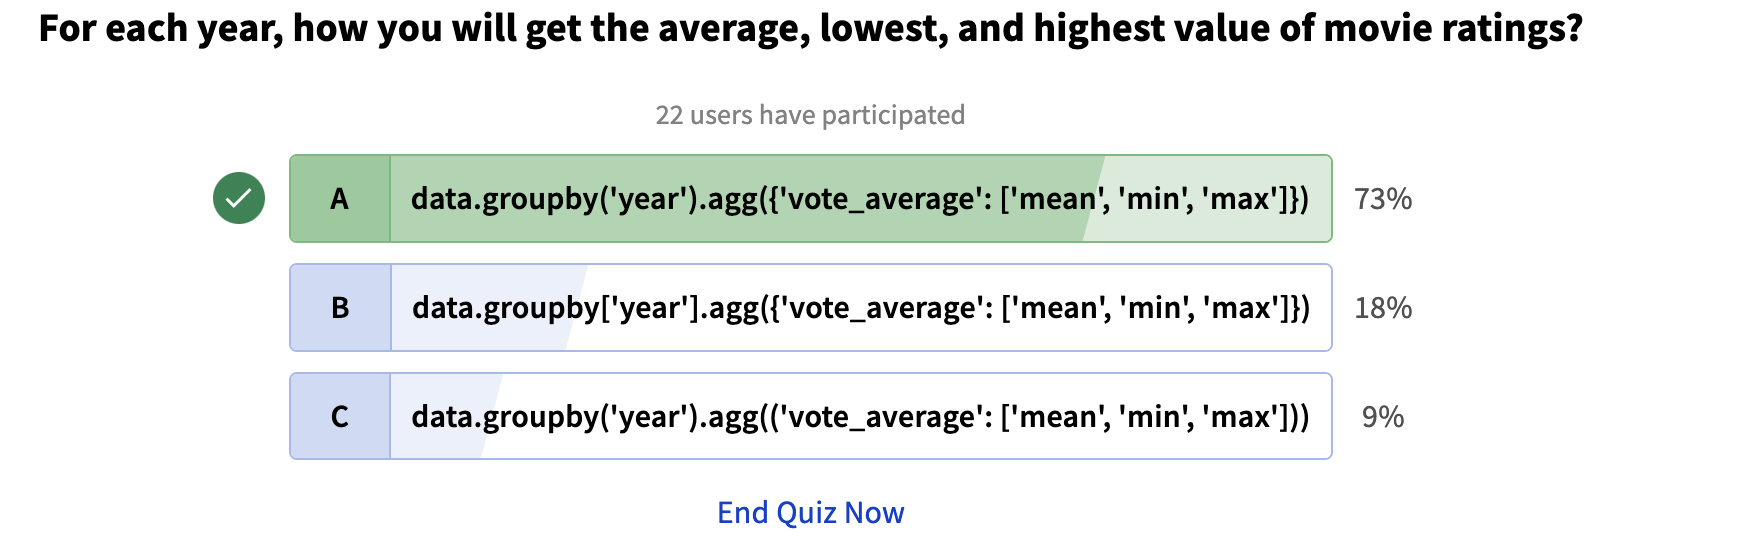

In [50]:
data.groupby('director_name')['year'].aggregate(['min', 'max'])

min   max
director_name                          
Adam McKay                   2004  2015
Adam Shankman                2001  2012
Alejandro González Iñárritu  2000  2015
Alex Proyas                  1994  2016
Alexander Payne              1999  2013
...                           ...   ...
Wes Craven                   1984  2011
Wolfgang Petersen            1981  2006
Woody Allen                  1977  2013
Zack Snyder                  2004  2016
Zhang Yimou                  2002  2014

[199 rows x 2 columns]

In [51]:
data.columns

Index(['id_movies', 'budget', 'popularity', 'revenue', 'title', 'vote_average',
       'vote_count', 'director_id', 'year', 'month', 'day', 'director_name',
       'gender', 'profit'],
      dtype='object')

In [52]:
data[['director_name', 'vote_average']]

director_name  vote_average
0         James Cameron           7.2
1         James Cameron           7.5
2         James Cameron           7.7
3         James Cameron           6.8
4         James Cameron           7.1
...                 ...           ...
1460  Nicole Holofcener           6.6
1461  Nicole Holofcener           5.1
1462  Nicole Holofcener           6.0
1463  Nicole Holofcener           6.6
1464  Nicole Holofcener           6.3

[1465 rows x 2 columns]

In [53]:
data.columns

Index(['id_movies', 'budget', 'popularity', 'revenue', 'title', 'vote_average',
       'vote_count', 'director_id', 'year', 'month', 'day', 'director_name',
       'gender', 'profit'],
      dtype='object')

if we don't specify for aggregate, it will try to aggregate full df.

In [55]:
data.groupby('director_name').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
data_num = data[['director_name','profit', 'revenue', 'vote_average']]

In [ ]:
data_num.groupby('director_name').mean()

quiz 2: id, rating
```
emd_data.groupby('id').mean()
emd_data.groupby('id')['rating'].mean()
```

## HW
HW: we will discuss in the next session
### filtering:

Q: Extract Directors whose atleast one movie had budget >100M.

### apply function on Group for custom function:

Q: find the most productive director?
productive: title_count/yrs_active for example let's say director d made his first movies in 2004 and his last movie in 2015. In between 2004 and 2015 he made 16 movies then his productive can be calculates as 16/(2004 - 2015) = 16/11 = 1.45 movies a year


In [ ]:
data

In [ ]:
def profit(x):
    return x['revenue'] - x['budget']

data.apply(profit, axis = 1)  # row one by one will be x

In [ ]:
x = data.loc[0]
x['revenue'] - x['budget']

In [ ]:
list1= [1,2,3,4]
list(map(lambda x: x+1, list1))

In [ ]:
data['profit'] = data.apply(profit, axis = 1)
data.head()
#I am confused with syntax and flow of the code and how to write such type of questions (syntax clarification)

how we will filter when we have movie date as 07/ 2024 and 08/2024 for same director??(if do apply on 'year')


In [ ]:
data.info()

In [ ]:
data['year'].astype(str) + data['year'].astype(str)

In [ ]:

np.argmax([1,2,1])

In [ ]:
data['year'].argmax()

In [ ]:
data[['year']].argmax()

In [ ]:
###  date time datatype

#how to add a row in dataframe at particular index?
# data.loc[1] = [full row]
# data.iloc[0] = [full row]
# split on index in two pars, add et end in split1 and then concatenate

In [ ]:
import pandas as pd

data = [['a', 20], ['b', 21], ['c', 22]]
df = pd.DataFrame(data, columns=['col1', 'col2']) # replace this with df1.colums for your question

print(df)

- copy deepcopy
- Request to solve pandas-2, question - 6 using concat func ...

In [ ]:
2011 in data['year'].to_list()

In [ ]:
data['year']

In [ ]:
import pandas as pd

# Create a sample DataFrame with null values
df = pd.DataFrame({
    'A': [1, 2, None],
    'B': [None, 3, 4]
})

def is_null(x):
    return sum(x.isnull())
# Apply the is_null function to each column
result = df.apply(is_null, axis=1)

print(result)

In [ ]:
!gdown 1UViHcT4lKDsTfc97gBqIvds25uHe4b5e

In [ ]:
df = pd.read_csv('sales.csv')
df.head()

In [ ]:
df[df.Country == 'United Kingdom']['StockCode'].nunique()

In [ ]:
df['purchase'] = df['Quantity'] * df['Price']
df.loc[df['purchase'].argmax()]

In [ ]:
import pandas as pd

s = pd.Series([10, 20, 30, 40, 50])
s.index = [10, 11, 12, 13, 14]

# Using idxmax: returns explicit index
result_idxmax = s.idxmax()
print("idxmax:", result_idxmax)  # Output: 4

# Using argmax: return implicit index
result_argmax = s.argmax()
print("argmax:", result_argmax)

In [ ]:
ind = df.groupby(['Description'])['Quantity'].sum().argmax()

In [ ]:
df.groupby(['Description'])['Quantity'].sum().reset_index().iloc[ind]

# Additional Topics

## Filter on Groups: Can we filter groups in a single go using Lambda functions? Yes!

In [57]:
data.groupby('director_name').filter(
    lambda x: x["budget"].max() >= 100
    )

id_movies     budget  popularity     revenue  \
0         43597  237000000         150  2787965087   
1         43622  200000000         100  1845034188   
2         43876  100000000         101   520000000   
3         43879  115000000          38   378882411   
4         44184   70000000          24    90000098   
...         ...        ...         ...         ...   
1460      46859          0          14    25288872   
1461      47023    6500000          11    13368437   
1462      47524    3000000           5           0   
1463      47962          0           0           0   
1464      48229     250000           1     4186931   

                           title  vote_average  vote_count  director_id  year  \
0                         Avatar           7.2       11800         4762  2009   
1                        Titanic           7.5        7562         4762  1997   
2     Terminator 2: Judgment Day           7.7        4185         4762  1991   
3                      True Lies           6.8        1116         4762  1994   
4                      The Abyss           7.1         808         4762  1989   
...                          ...           ...         ...          ...   ...   
1460                 Enough Said           6.6         348         6204  2013   
1461          Friends with Money           5.1         128         6204  2006   
1462                 Please Give           6.0          57         6204  2010   
1463         Walking and Talking           6.6           7         6204  1996   
1464            Lovely & Amazing           6.3          23         6204  2001   

     month        day      director_name  gender      profit  
0      Dec   Thursday      James Cameron       0  2550965087  
1      Nov    Tuesday      James Cameron       0  1645034188  
2      Jul     Monday      James Cameron       0   420000000  
3      Jul   Thursday      James Cameron       0   263882411  
4      Aug  Wednesday      James Cameron       0    20000098  
...    ...        ...                ...     ...         ...  
1460   Sep  Wednesday  Nicole Holofcener       1    25288872  
1461   Sep   Thursday  Nicole Holofcener       1     6868437  
1462   Jan     Friday  Nicole Holofcener       1    -3000000  
1463   Jul  Wednesday  Nicole Holofcener       1           0  
1464   Aug     Friday  Nicole Holofcener       1     3936931  

[1465 rows x 14 columns]

- We first group data by director and then use groupby().filter function.
- Groups are filtered if they do not satisfy the boolean criterion specified by the function.
- This is called Group Based Filtering.

Q: Will the result change if we filter "budget" first and then do groupby on Directors?

### Group based Apply: applying a function on grouped objects
- What if we want to do the transformation of a column using some column's agrregate

- Let's say, we want to filter the risky movies whose budget was even higher than the average revenue of the director from his other movies.

We can subtract the average revenue of a director from budget column, for each director.

In [60]:
def func(x):
  # returns whether a movie is risky or not
  x["risky"] = x["budget"] - x["revenue"].mean() >= 0
  return x

data_risky = data.groupby("director_name",
                          group_keys=False).apply(func)
data_risky

id_movies     budget  popularity     revenue  \
0         43597  237000000         150  2787965087   
1         43622  200000000         100  1845034188   
2         43876  100000000         101   520000000   
3         43879  115000000          38   378882411   
4         44184   70000000          24    90000098   
...         ...        ...         ...         ...   
1460      46859          0          14    25288872   
1461      47023    6500000          11    13368437   
1462      47524    3000000           5           0   
1463      47962          0           0           0   
1464      48229     250000           1     4186931   

                           title  vote_average  vote_count  director_id  year  \
0                         Avatar           7.2       11800         4762  2009   
1                        Titanic           7.5        7562         4762  1997   
2     Terminator 2: Judgment Day           7.7        4185         4762  1991   
3                      True Lies           6.8        1116         4762  1994   
4                      The Abyss           7.1         808         4762  1989   
...                          ...           ...         ...          ...   ...   
1460                 Enough Said           6.6         348         6204  2013   
1461          Friends with Money           5.1         128         6204  2006   
1462                 Please Give           6.0          57         6204  2010   
1463         Walking and Talking           6.6           7         6204  1996   
1464            Lovely & Amazing           6.3          23         6204  2001   

     month        day      director_name  gender      profit  risky  
0      Dec   Thursday      James Cameron       0  2550965087  False  
1      Nov    Tuesday      James Cameron       0  1645034188  False  
2      Jul     Monday      James Cameron       0   420000000  False  
3      Jul   Thursday      James Cameron       0   263882411  False  
4      Aug  Wednesday      James Cameron       0    20000098  False  
...    ...        ...                ...     ...         ...    ...  
1460   Sep  Wednesday  Nicole Holofcener       1    25288872  False  
1461   Sep   Thursday  Nicole Holofcener       1     6868437  False  
1462   Jan     Friday  Nicole Holofcener       1    -3000000  False  
1463   Jul  Wednesday  Nicole Holofcener       1           0  False  
1464   Aug     Friday  Nicole Holofcener       1     3936931  False  

[1465 rows x 15 columns]

Note:


- Setting group_keys=True, keeps the group key in the returned dataset avoiding multi-index on Group Keys(see example below).
- This will be default in future versions of Pandas. Currently default is False
- Keep it as False if you want the normal behaviour.

Q: What did we do here?

- Defined a custom function.
Grouped data according to director_name.
- Subtracted the mean of budget from revenue.
- Used apply with the custom function on the grouped data.

In [61]:
def func(x):
  # returns whether a movie is risky or not
  x["risky"] = x["budget"] - x["revenue"].mean() >= 0
  return x

data_risky = data.groupby("director_name").apply(func)
data_risky

id_movies     budget  popularity    revenue  \
director_name                                                    
Adam McKay    635      43882  100000000          24  170432927   
              636      44151   72500000          12  162966177   
              637      44236   65000000          22  128107642   
              638      44503   50000000          38  173649015   
              639      45301   28000000          57  133346506   
...                      ...        ...         ...        ...   
Zhang Yimou   675      44692        110           9          0   
              676      44733   31000000          23  177394432   
              677      46460          0          21   92863945   
              678      46493          0           1          0   
              679      47489          0           6          0   

                                                         title  vote_average  \
director_name                                                                  
Adam McKay    635                               The Other Guys           6.1   
              636  Talladega Nights: The Ballad of Ricky Bobby           6.2   
              637                                Step Brothers           6.5   
              638            Anchorman 2: The Legend Continues           6.0   
              639                                The Big Short           7.3   
...                                                        ...           ...   
Zhang Yimou   675                   Curse of the Golden Flower           6.6   
              676                                         Hero           7.2   
              677                      House of Flying Daggers           7.1   
              678             A Woman, a Gun and a Noodle Shop           4.8   
              679                                  Coming Home           6.9   

                   vote_count  director_id  year month        day  \
director_name                                                       
Adam McKay    635        1383         4925  2010   Aug     Friday   
              636         491         4925  2006   Aug     Friday   
              637        1062         4925  2008   Jul     Friday   
              638         923         4925  2013   Dec  Wednesday   
              639        2607         4925  2015   Dec     Friday   
...                       ...          ...   ...   ...        ...   
Zhang Yimou   675         203         4945  2006   Dec   Thursday   
              676         635         4945  2002   Dec   Thursday   
              677         439         4945  2004   May  Wednesday   
              678          13         4945  2009   Dec     Friday   
              679          49         4945  2014   May     Friday   

                  director_name  gender     profit  risky  
director_name                                              
Adam McKay    635    Adam McKay       0   70432927  False  
              636    Adam McKay       0   90466177  False  
              637    Adam McKay       0   63107642  False  
              638    Adam McKay       0  123649015  False  
              639    Adam McKay       0  105346506  False  
...                         ...     ...        ...    ...  
Zhang Yimou   675   Zhang Yimou       0       -110  False  
              676   Zhang Yimou       0  146394432  False  
              677   Zhang Yimou       0   92863945  False  
              678   Zhang Yimou       0          0  False  
              679   Zhang Yimou       0          0  False  

[1465 rows x 15 columns]